In [1]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

In [2]:
spark = SparkSession.builder.master("spark://172.18.0.4:7077").appName("read_price").getOrCreate()

In [ ]:
csvFile = spark.read.format("csv")\
.option("header", "true")\
.option("inferSchema", "true")\
.load("hdfs://namenode:9000/myfile/price_gold.csv")

In [3]:
csvFile.printSchema()

NameError: name 'csvFile' is not defined

In [5]:
csvFile.count()


10941

In [12]:
csvFile.select("Name", 
               "US_dollar", 
               "Euro", 
               "Japanese_yen", 
               "Vietnamese_dong", 
               "Thai_baht", 
               "Australian_dollar",
              "Chinese_renmimbi", 
              "Australian_dollar").show(20)

+----------+---------+-----+------------+---------------+---------+-----------------+----------------+-----------------+
|      Name|US_dollar| Euro|Japanese_yen|Vietnamese_dong|Thai_baht|Australian_dollar|Chinese_renmimbi|Australian_dollar|
+----------+---------+-----+------------+---------------+---------+-----------------+----------------+-----------------+
|12/29/1978|      226|137.1|        #N/A|           #N/A|     #N/A|             #N/A|            #N/A|             #N/A|
|  1/1/1979|      226|137.1|        #N/A|           #N/A|     #N/A|             #N/A|            #N/A|             #N/A|
|  1/2/1979|    226.8|137.3|   43,164.90|           #N/A| 4,454.60|            193.6|            #N/A|            193.6|
|  1/3/1979|    218.6|  134|   43,717.90|           #N/A| 4,477.70|              193|            #N/A|              193|
|  1/4/1979|    223.2|136.8|   43,674.90|           #N/A| 4,501.50|            194.6|            #N/A|            194.6|
|  1/5/1979|    225.5|138.4|   4

In [17]:
df = csvFile.selectExpr("cast(Name as string) Date",
                        "cast(US_dollar as double) US_dollar",
                        "cast(Euro as double) Euro",
                       "cast(Japanese_yen as double) Japanese_yen",
                       "cast(Canadian_dollar as double) Canadian_dollar",
                       "cast(Indian_rupee as double) Indian_rupee",
                       "cast(Chinese_renmimbi as double) Chinese_renmimbi",
                       "cast(Indonesian_rupiah as double) Indonesian_rupiah",
                       "cast(UAE_dirham as double) UAE_dirham",
                       "cast(Thai_baht as double) Thai_baht",
                       "cast(Vietnamese_dong as double) Vietnamese_dong",
                       "cast(Egyptian_pound as double) Egyptian_pound",
                       "cast(Korean_won as double) Korean_won",
                       "cast(Russian_ruble as double) Russian_ruble",
                       "cast(SouthAfrican_rand as double) SouthAfrican_rand",
                       "cast(Australian_dollar as double) Australian_dollar")

In [18]:
df.printSchema()

root
 |-- Date: string (nullable = true)
 |-- US_dollar: double (nullable = true)
 |-- Euro: double (nullable = true)
 |-- Japanese_yen: double (nullable = true)
 |-- Canadian_dollar: double (nullable = true)
 |-- Indian_rupee: double (nullable = true)
 |-- Chinese_renmimbi: double (nullable = true)
 |-- Indonesian_rupiah: double (nullable = true)
 |-- UAE_dirham: double (nullable = true)
 |-- Thai_baht: double (nullable = true)
 |-- Vietnamese_dong: double (nullable = true)
 |-- Egyptian_pound: double (nullable = true)
 |-- Korean_won: double (nullable = true)
 |-- Russian_ruble: double (nullable = true)
 |-- SouthAfrican_rand: double (nullable = true)
 |-- Australian_dollar: double (nullable = true)



In [19]:
df.select("Date", 
               "US_dollar", 
               "Euro", 
               "Japanese_yen", 
               "Vietnamese_dong", 
               "Thai_baht", 
               "Australian_dollar",
              "Chinese_renmimbi", 
              "Australian_dollar").show(20)

+----------+---------+-----+------------+---------------+---------+-----------------+----------------+-----------------+
|      Date|US_dollar| Euro|Japanese_yen|Vietnamese_dong|Thai_baht|Australian_dollar|Chinese_renmimbi|Australian_dollar|
+----------+---------+-----+------------+---------------+---------+-----------------+----------------+-----------------+
|12/29/1978|    226.0|137.1|        null|           null|     null|             null|            null|             null|
|  1/1/1979|    226.0|137.1|        null|           null|     null|             null|            null|             null|
|  1/2/1979|    226.8|137.3|        null|           null|     null|            193.6|            null|            193.6|
|  1/3/1979|    218.6|134.0|        null|           null|     null|            193.0|            null|            193.0|
|  1/4/1979|    223.2|136.8|        null|           null|     null|            194.6|            null|            194.6|
|  1/5/1979|    225.5|138.4|    

In [20]:
df.count()

10941

In [23]:
df.distinct().count()

10941

In [24]:
df_panda = df.toPandas()

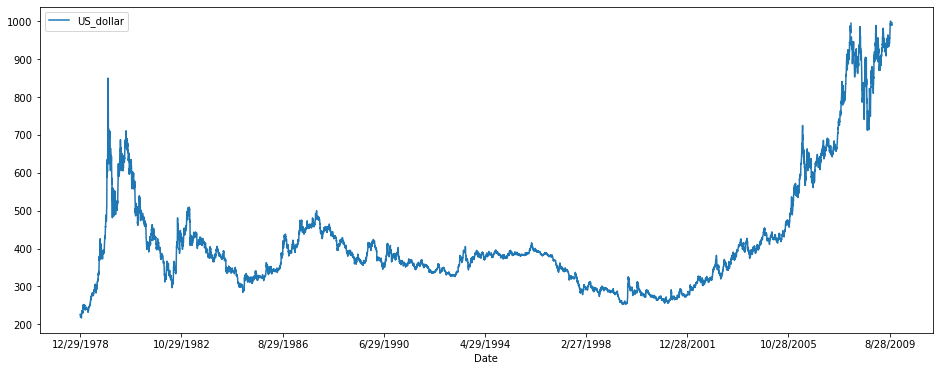

In [28]:
ax = df_panda.plot(x='Date', y= 'US_dollar', label='US_dollar', figsize=(16,6))

<AxesSubplot:ylabel='Density'>

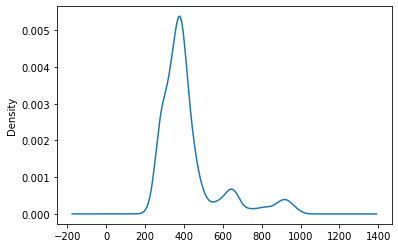

In [29]:
df_panda['US_dollar'].plot(kind= 'kde', label = 'US_dollar')

<AxesSubplot:>

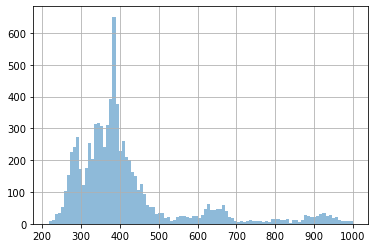

In [30]:
df_panda['US_dollar'].hist(bins=100, label='US_dollar',alpha=0.5)